# CIRESA

## CIRESA is a tool for finding, analyzing and comparing co-rotating interaction regions (CIRs).

### Usages:
#### 1. Loading and plotting spacecraft data
#### 2. Ballistically propagating spacecraft data

Color code:\
Yellow: Perturbed slow wind\
Red: Perturbed fast wind\
Black: Background solar wind\

## 1. Loading and plotting spacecraft data

reduced_data/psp\psp_data2022-10.parquet


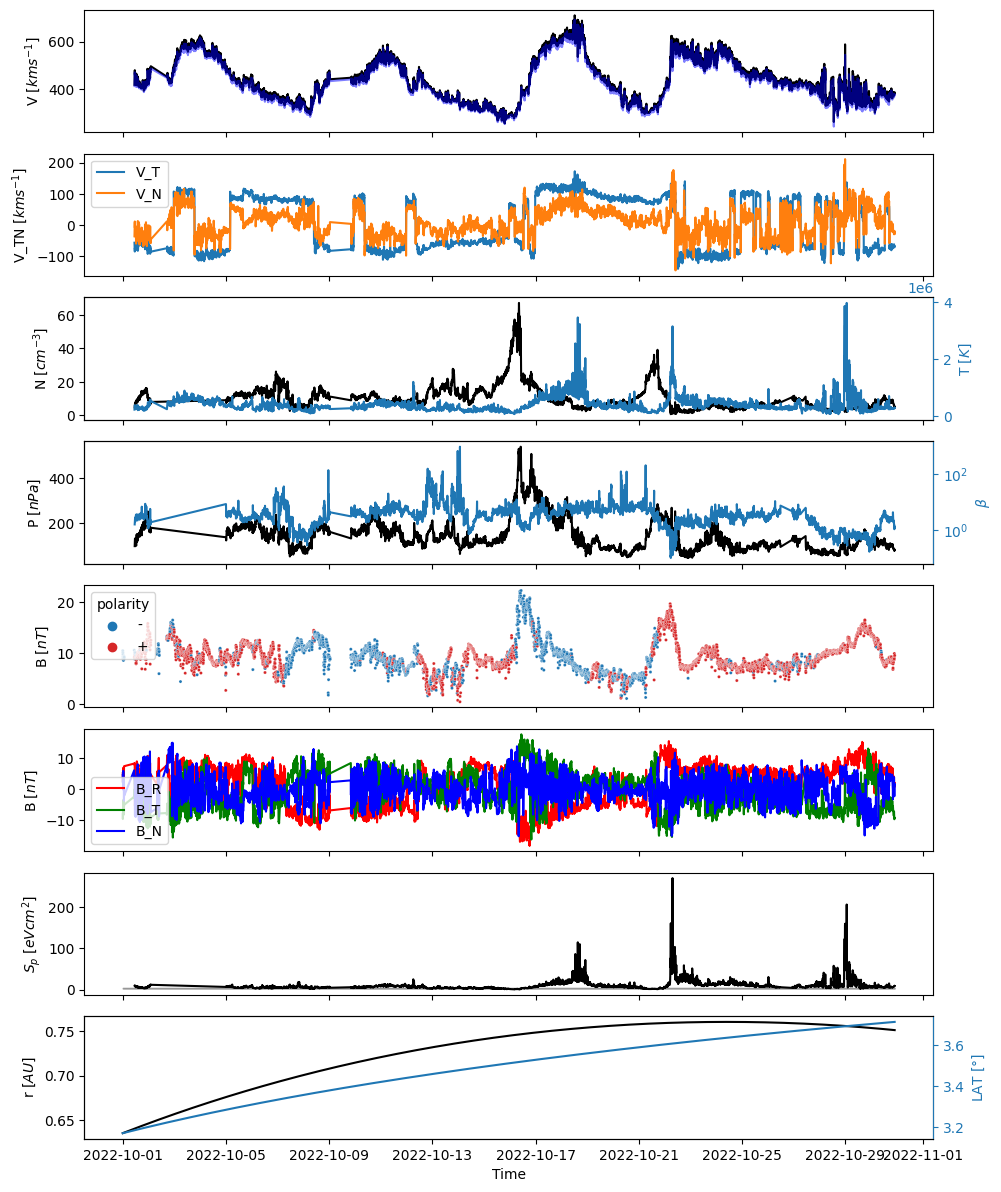

In [1]:
from CIRESA import stereo_a, omni, solo, psp, maven

data_df = psp.load('2022-10')
psp.plot(data_df)


## 1.2 Semi-automatically identify CIR regions

In [ ]:
from CIRESA import stereo_a, omni, solo, psp, maven, CIR_detector, plot_heliosphere
import matplotlib.pyplot as plt
import pandas as pd

start_date = '2022-09'
#start_date = '2019-11'
end_date = '2022-12'

# Generate a date range with monthly frequency
months = pd.date_range(start=start_date, end=end_date, freq='M').strftime('%Y-%m').tolist()

data = omni.load(months)

CIR = CIR_detector.plot_and_choose_CIR(data)
CIR_detector.save_to_CIR_data_base(CIR)

## Plot the identified CIR

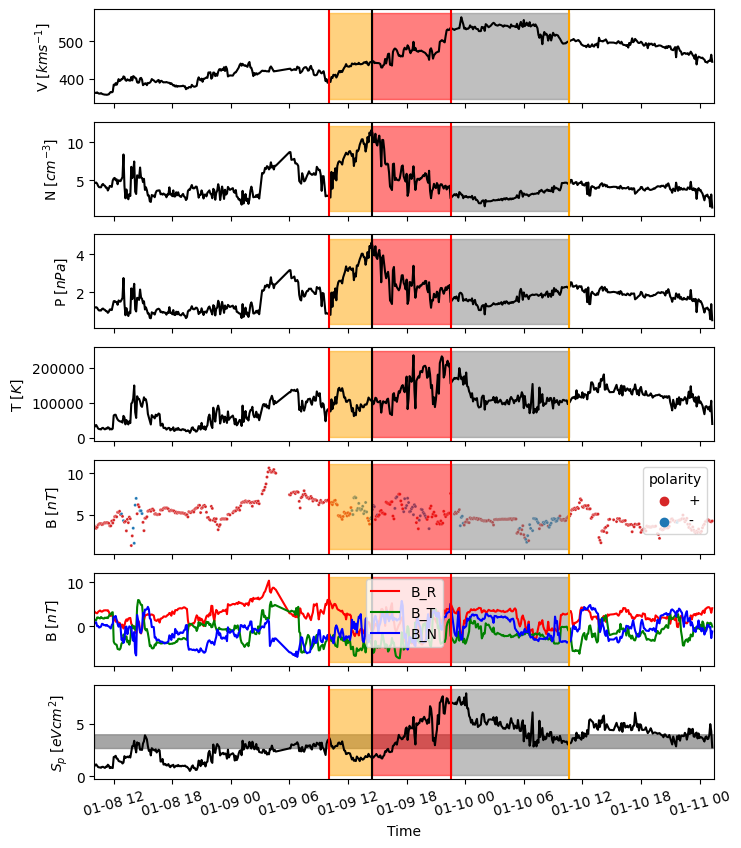

In [1]:
from CIRESA import CIR_detector
import matplotlib.pyplot as plt
import pandas as pd

CIR = pd.read_parquet('CIR_Database\OMNI2020-01-08---2020-01-11.parquet')

CIR_detector.plot_identified_CIR(CIR)
plt.show()

## Load all CIRs from a month and plot them in a polar plot

CIR_Database\MAVEN2020-02-11---2020-02-21.parquet
CIR_Database\OMNI2020-01-29---2020-02-03.parquet
CIR_Database\OMNI2020-02-05---2020-02-10.parquet
CIR_Database\OMNI2020-02-20---2020-02-24.parquet
CIR_Database\OMNI2020-02-27---2020-03-02.parquet


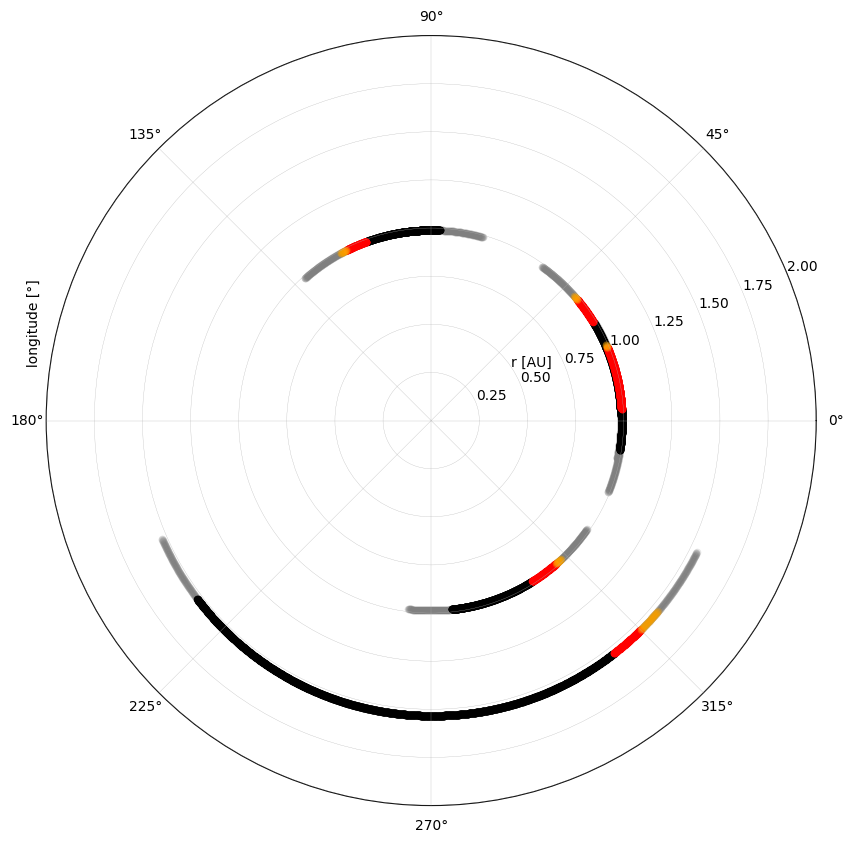

In [1]:
from CIRESA import CIR_detector, plot_heliosphere
import matplotlib.pyplot as plt

CIR = CIR_detector.load_CIR(month='2020-02', concat=True)

plot_heliosphere.plot_CIR_carrington(CIR, rlim=2)
plt.show()

# 2. Propagate spacecraft data

reduced_data/solo\solo_data2023-10.parquet


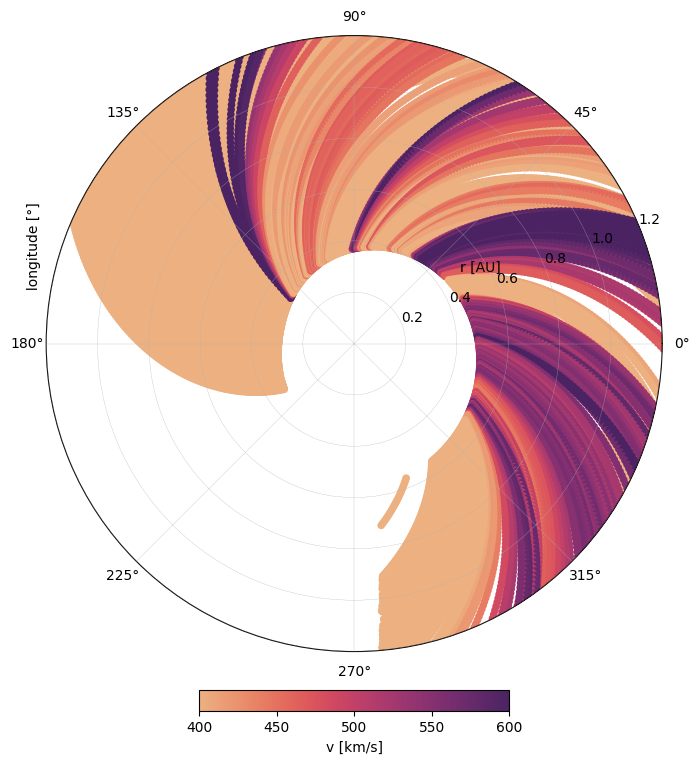

In [10]:
import matplotlib.pyplot as plt
from CIRESA import propagation, plot_heliosphere, solo

data = solo.load(month='2023-10')

propagated_data = propagation.ballistic(data)
plot_heliosphere.plot_spacecraft_carrington(propagated_data, rlim=1.2)
plt.show()

## 2.1 Propagate identified CIR Regions

CIR_Database\MAVEN2020-02-11---2020-02-21.parquet
CIR_Database\OMNI2020-01-29---2020-02-03.parquet
CIR_Database\OMNI2020-02-05---2020-02-10.parquet
CIR_Database\OMNI2020-02-20---2020-02-24.parquet
CIR_Database\OMNI2020-02-27---2020-03-02.parquet


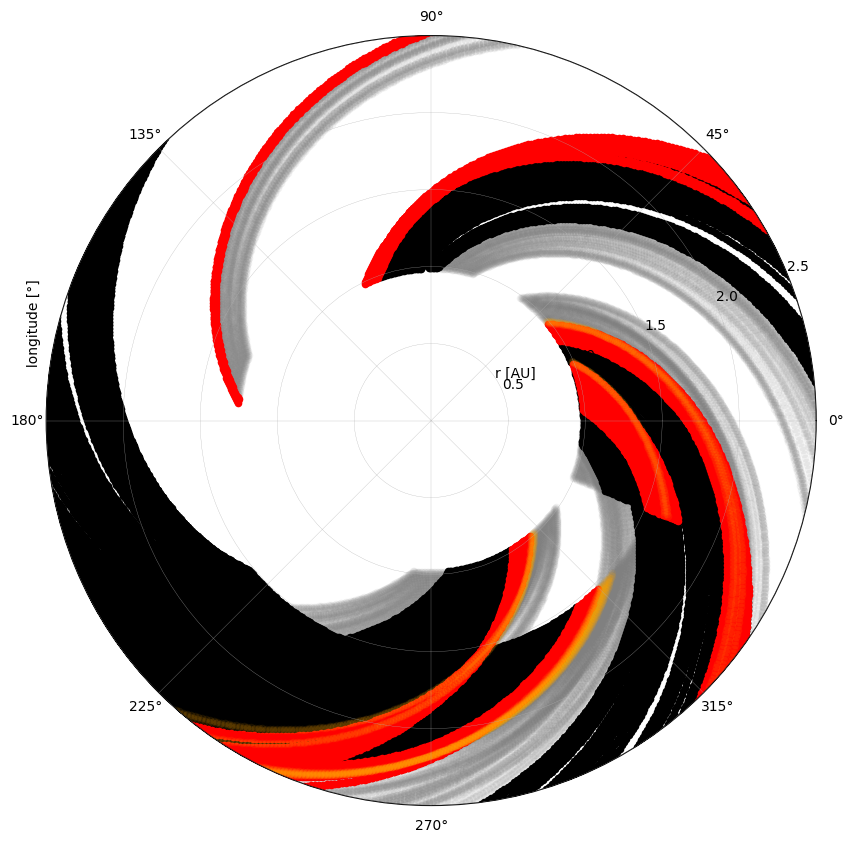

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
from CIRESA import propagation, plot_heliosphere, CIR_detector

CIR = CIR_detector.load_CIR(month='2020-02', concat=True)

propagated_CIR = propagation.ballistic(CIR)
plot_heliosphere.plot_CIR_carrington(propagated_CIR, rlim=2.5)
plt.show()